<a href="https://colab.research.google.com/github/NeuroLuke/ModuleComputationalNeuroscience2024/blob/main/LK_ConceptCells_20240510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NOTE:** Please first make a copy of this tutorial, and then use your copy for running and making any changes.

# **Simulation and analysis of concept cells**

### **Overview**

The goal of this tutorial is to give you an example of how one can simulate and analyze the activity of concept cells. Please try to write Python code to achieve the following aims:
1. Simulate the subject's behavior such that it is presented with a number of different concepts, each concept several times.
2. Simulate the activity of a concept cell that is tuned to one of the concepts.
3. Analyze this concept cell so that you can make an analytical decision whether it is a concept cell or not.

If you have difficulties writing the code on your own, refer to section 4 to get some inspiration for steps 1 to 3.


## **Setting up the Python environment**

### Import necessary packages

One of the main advantages of Python is that it is easily modified and extended to new use cases. A primary consequence of this is **packages**. Here, packages refer to open-sourced libraries of code that have been developed for specific purposes, like statistical analysis, plotting, or machine learning. They are not built-in to Python itself, but must be **imported** into your script in order to use them.

In this notebook, we will primarily use three packages, **numpy**, **pandas** and **matplotlib**. These packages give you a large range of new functions and methods to work with and make it a lot easier to work with scientific data!

If you are ever curious about a package's function or need to know how to use it, you can find this info in the package **documentation**.

Feel free to import additional packages if needed.

In [ ]:
# let's import some useful packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu # to compute Mann Whitney U tests
from scipy.ndimage import uniform_filter1d # for smoothing

## **Section 1: Simulate the subject's behavior**

In studies investigating concept cells, subjects are typically presented with many different concepts during a **concept-cell screening**. Since this is a simulation study, we need to simulate which concepts are presented during this screening.

Please complete the following two tasks:
1. Write some code to simulate 800 trials in which the subject is presented with 100 different concepts, each 8 times, in random order. Feel free to use other settings (more/less trials etc).

In [ ]:
# code for simulating the presentation of concepts

## **Section 2: Simulate a concept cell**

A concept cell is a cell that fires its action potentials whenever the subject is presented with a particular concept. A concept cell can be tuned to a single concept (then it is very selective) or it can be tuned to several concepts (then it is less selective).

Please complete the following two tasks:
1. Write some code to simulate the activity of such a cell over time on each trial.
2. Plot the cell's activity as a function of time during stimulus presentation and the preceding baseline.



In [ ]:
# code for simulating the activity of the concept cell

In [ ]:
# code for plotting the simulated concept cell

## **Section 3: Analyze the concept cell**

To identify whether the a cell qualifies as a concept cell, concept-cell studies often compare the cell's firing rate during stimulus presentation with its firing rate during the baseline period.

Please complete the following three tasks:
1. Understand how previous studies compared the cell's firing rate during stimulus presentation with its firing rate during the baseline period. To this end, have a look at the Methods section in Mormann et al., Journal of Neuroscience, 2008.
2. Calculate the test statistic and its p-value for each concept. You can do this in a time-resolved manner.
3. Test whether the test statistic and its p-value is significant for the preferred concept and unsignificant for all other concepts.
4. Think about the problem of calculating the test statistic many times (including many time points per trial and many different concepts). Is it a problem if you perform a test multiple times?

In [ ]:
# code for analyzing the concept cell

## **Section 4: helper code**

If you have problems writing the code on your own, you can use the code below as an inspiration.

Let's start with defining some parameters. It's useful to declare all parameters at the beginning of a script so that they are easily visible when starting the analysis.

In [ ]:
# settings for behavior
num_concepts = 20 # number of concepts
concepts = np.arange(0, num_concepts)
concept_per_trial = np.repeat(concepts, 20)
trial_idx = np.arange(0, len(concept_per_trial))

# in a real study, we would randomize the concepts across trials, but here we'll keep the block design for simplicity
# np.random.shuffle(concept_per_trial)

# settings for the firing rates of the cells
preferred_concept = 0 # preferred concept of the cell
preferred_latency = 0.4 # seconds; cf. Mormann et al., J Neurosci, 2008
preferred_firing_rate = 100 # Hz
baseline_firing_rate = 2 # Hz
preferred_width = 0.1 # standard deviation of the Gaussian distribution

# settings for the trials
trial_start_time = -1
trial_end_time = 1
trial_duration = trial_end_time - trial_start_time

# settinsg for the analysis
analysis_period_start = -1 # seconds
analysis_period_end = 1 # seconds
analysis_bin_size = 0.05 # Duration of each bin in milliseconds
analysis_num_bins = int((analysis_period_end - analysis_period_start) / analysis_bin_size) # number of bins
analysis_overlap = 0 # temporal overlap between bins

# individual analysis periods
analysis_periods = []
for i in range(analysis_num_bins):
    start = np.round(analysis_period_start + i * (analysis_bin_size - analysis_overlap), 3)
    end = np.round(start + analysis_bin_size, 3)
    analysis_periods.append([start, end])
analysis_time_points = np.mean(analysis_periods, axis = 1)

# settings for estimating statistics
stats_baseline_start = -1
stats_baseline_end = 0
stats_period_start = 0
stats_period_end = 1
stats_bin_size = 0.05
stats_num_bins = int((stats_period_end - stats_period_start) / stats_bin_size)
stats_overlap = 0

# individual stats periods
stats_periods = []
for i in range(stats_num_bins):
    start = np.round(stats_period_start + i * (stats_bin_size - stats_overlap), 3)
    end = np.round(start + stats_bin_size, 3)
    stats_periods.append([start, end])
stats_time_points = np.mean(stats_periods, axis = 1)

# settings for creating a raster plot
raster_period_start = -1
raster_period_end = 1
raster_bin_size = 0.01
raster_num_bins = int((raster_period_end - raster_period_start) / raster_bin_size)
raster_overlap = 0

# individual raster periods
raster_periods = []
for i in range(raster_num_bins):
    start = np.round(raster_period_start + i * (raster_bin_size - raster_overlap), 3)
    end = np.round(start + raster_bin_size, 3)
    raster_periods.append([start, end])
raster_time_points = np.mean(raster_periods, axis = 1)

❓ **Why should you randomize the concepts across trials in a real study?**

❓ **What is the ideal duration for a baseline period?**

❓ **What are the pros and cons of having more trials per concept?**

Let's simulate the spike times (i.e., the time points of the action potentials) of a concept cell that is tuned to a single concept. We'll simulate a neuron that has a relatively low baseline firing rate and that strongly increases its spiking during trials in which the preferred concept is presented.

In [ ]:
# preallocate spike times for each trial
spike_times = [np.nan] * len(concept_per_trial)

# loop through trials
for i_trial in range(len(concept_per_trial)):

    # baseline spike times (uniformly distributed)
    baseline_num_spikes = trial_duration * baseline_firing_rate
    baseline_spike_times = np.random.uniform(low = trial_start_time, high = trial_end_time, size = int(baseline_num_spikes))
    baseline_spike_times.sort()

    # add new spike times
    spike_times[i_trial] = baseline_spike_times

    # if it is the cell's preferred concept
    if concept_per_trial[i_trial] == preferred_concept:

        # calculate expected number of peak spikes
        peak_num_spikes = (preferred_firing_rate - baseline_firing_rate) * preferred_width * np.sqrt(2 * np.pi) # approximation based on area under Gaussian curve

        # generate random spike times for peak activity (normally distributed)
        peak_spike_times = np.random.normal(loc = preferred_latency, scale = preferred_width, size = int(peak_num_spikes))

        # combine and sort spike times
        all_spike_times = np.concatenate((baseline_spike_times, peak_spike_times))
        all_spike_times.sort()

        # add new spikes
        spike_times[i_trial] = all_spike_times

❓ **How do we simulate the increased spiking of the cell during trials with the preferred concept here?**

❓ **Are there better ways of simulating the increased spiking of the cell during trials with the preferred concept? Feel free to be creative!**

Excellent! Now we have simulated the spike times of a concept cell representing a single concept via its spiking activity. In an empirical study, we would get this spiking activity from the recording and would start with the analysis directly.

Before performing statistical analyses, let's create a raster plot of the spike times of the neuron to get a sense for its activity during particular trials. In creating the raster plot, we'll use a high temporal resolution to approximate the display of individual spikes (though we'll combine spikes that are relatively close to each other).

In [ ]:
# create a raster plot of the spike times
num_spikes_raster = np.full((len(concept_per_trial), len(raster_periods)), np.nan)
for i_trial in range(num_spikes_raster.shape[0]):
    for i_time in range(num_spikes_raster.shape[1]):
        num_spikes_raster[i_trial, i_time] = np.sum((spike_times[i_trial] >= raster_periods[i_time][0]) & (spike_times[i_trial] < raster_periods[i_time][1]))

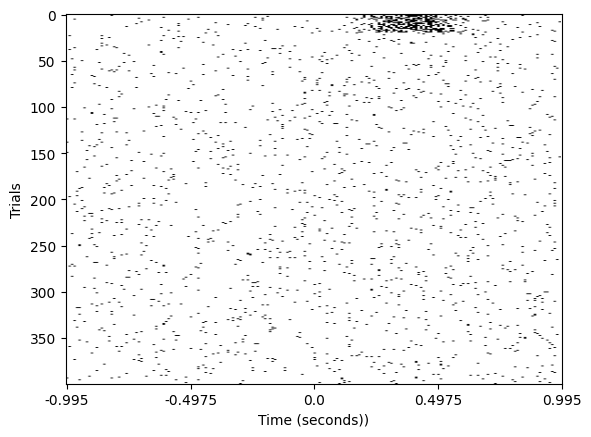

In [ ]:
# show the raster plot
plt.figure()
plt.imshow(num_spikes_raster > 0, aspect = 'auto', cmap = 'gray_r')
plt.xlabel('Time (seconds))')
plt.ylabel('Trials')
plt.xticks(ticks = np.linspace(0, num_spikes_raster.shape[1], 5), labels = np.round(np.linspace(np.min(raster_time_points), np.max(raster_time_points), 5), 4));

❓ **What does the raster plot show?**

To start with the analysis, let's estimate the number of spikes for each time bin in each trial. Knowing the duration of the time bins, we can then calculate the firing rate of the neuron in each time bin.

In contrast to creating the raster plot, we'll use broader time bins here which will simplify the analysis.

In [ ]:
# estimate number of spikes in each trial * time-bin
num_spikes = np.full((len(concept_per_trial), len(analysis_periods)), np.nan)
num_spikes_baseline = np.full((len(concept_per_trial)), np.nan)
num_spikes_stats = np.full((len(concept_per_trial), len(stats_periods)), np.nan)
for i_trial in range(num_spikes.shape[0]):
    # number of spikes in each time bin
    for i_time in range(num_spikes.shape[1]):
        num_spikes[i_trial, i_time] = np.sum((spike_times[i_trial] >= analysis_periods[i_time][0]) & (spike_times[i_trial] < analysis_periods[i_time][1]))
    # number of spikes in each baseline period
    num_spikes_baseline[i_trial] = np.sum((spike_times[i_trial] >= stats_baseline_start) & (spike_times[i_trial] < stats_baseline_end))
    # number of spikes in each stats period
    for i_time in range(num_spikes_stats.shape[1]):
        num_spikes_stats[i_trial, i_time] = np.sum((spike_times[i_trial] >= stats_periods[i_time][0]) & (spike_times[i_trial] < stats_periods[i_time][1]))

# estimate firing rate in each trial * time-bin
FR = num_spikes / analysis_bin_size
FR_baseline = num_spikes_baseline / (stats_baseline_end - stats_baseline_start)
FR_stats = num_spikes_stats / stats_bin_size

# smooth the firing rates
FR = uniform_filter1d(FR, size = 5, axis = 1)
FR_stats = uniform_filter1d(FR_stats, size = 5, axis = 1)

❓ **What are the pros and cons of smoothing the firing rates?**

❓ **What happens if you increase or decrease the amoung of smoothing?**

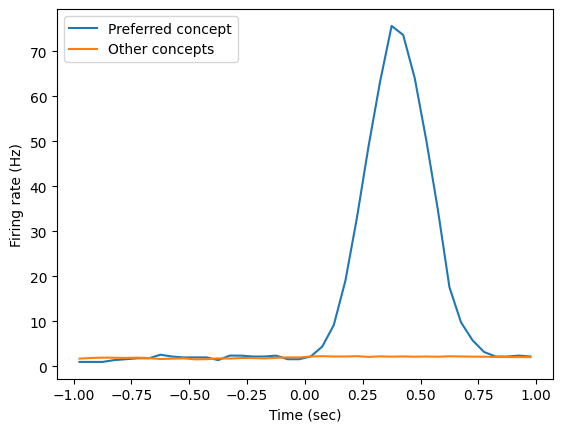

In [ ]:
# plotting the firing rates for the analysis
plt.figure()
plt.plot(analysis_time_points, np.mean(FR[concept_per_trial == preferred_concept, :], axis = 0))
plt.plot(analysis_time_points, np.mean(FR[concept_per_trial != preferred_concept, :], axis = 0))
plt.xlabel('Time (sec)')
plt.ylabel('Firing rate (Hz)')
plt.legend(['Preferred concept', 'Other concepts'])
plt.show()

❓ **What does this figure show?**

Here, we simulated this cell as a concept cell, so we can be 100% sure that it is really a concept cell.

However, if we didn't know the ground truth, we would need a method for testing whether the firing rates of this cell are indeed modulated by a particular concept. This can be done, for example, by comparing the firing rates during concept presentation with the firing rates during the baseline period.

We thus compare the bin-wise firing rates during concept presentation with the firing rates during the baseline period. As the statistical test, we are going to use a two-tailed Mann-Whitney U test. Because we will compute this test for multiple time bins during concept presentation, we have to correct the p-value for multiple comparisons. Here, we will use the Bonferroni-correction method to do this.

In [ ]:
# preallocate the p-values of the statistical tests
p = np.full((len(concepts), stats_num_bins), np.nan)

# loop through the concepts
for i_concept in range(len(concepts)):
    this_FR_baseline = FR_baseline[concept_per_trial == i_concept]
    this_FR_stats = FR_stats[concept_per_trial == i_concept]
    # loop through time points
    for i_time in range(this_FR_stats.shape[1]):
        _, p[i_concept, i_time] = mannwhitneyu(this_FR_stats[:, i_time], this_FR_baseline, alternative = 'greater')

❓ **What does this code do?**

In [ ]:
# Bonferroni correction for the number of concepts and time points
p = p * np.size(p)

❓ **What is the problem of multiple comparisons?**

❓ **Which methods can be used to control for the problem of multiple comparisons?**

In [ ]:
print('The minimum p-value (Bonferroni-corrected) is: ' + str(np.min(p)))

The minimum p-value (Bonferroni-corrected) is: 9.586695867596971e-06


❓ **What does this p-value mean?**

❓ **What else do you need to know? Write some code to obtain the important information!**

# **You've reached the end of the tutorial!**

If you're interested in learning more, check out the next section.


## **Further Reading**

#### Documentations of the imported libraries
* [Numpy](https://numpy.org/doc/stable/)
* [Pandas](https://pandas.pydata.org/docs/)
* [Matplotlib](https://matplotlib.org/stable/contents.html)
* [Scipy](https://docs.scipy.org/doc/scipy/)

#### Tutorials for using pyplot, pandas, and numpy
* [Pyplot Tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
* [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)

#### Concept-cell papers
* [Original report](https://www.nature.com/articles/nature03687)
* [Analysis of concept cells](https://www.jneurosci.org/content/28/36/8865)
* [Concept cells and abstract relationships](https://www.nature.com/articles/s41467-021-26327-3)